In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


#Probing data

In [225]:
train_set = pd.read_csv('train.csv')
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [226]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [227]:
train_set.shape

(891, 12)

In [228]:
#looking for null values
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [229]:
#Looking for non null cabin values
train_set[train_set['Cabin'].isnull()==False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [230]:
#Droping coloumns with no relevant information
train_set = train_set.drop(['Name','Cabin','Ticket'],axis=1)
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [231]:
train_set['PassengerId'].duplicated().sum()

0

In [232]:
sur_sex = [train_set.groupby(['Sex']).sum()['Survived'][0],train_set.groupby(['Sex']).sum()['Survived'][1]]
geral_sex = np.unique(train_set['Sex'],return_counts=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sex survived count')

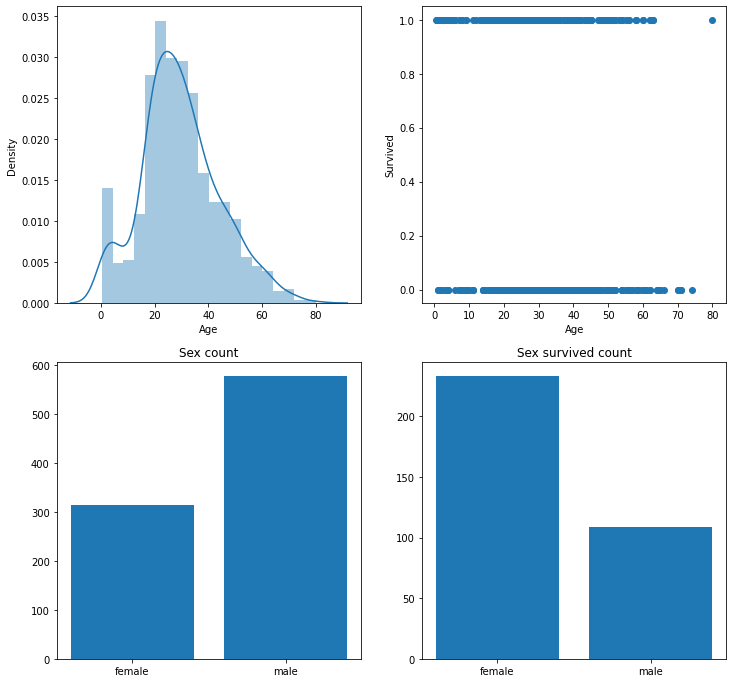

In [233]:
#Exploring some ideias

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.distplot(train_set['Age'])
plt.subplot(2,2,2)
plt.scatter(train_set['Age'],train_set['Survived'])
plt.ylabel('Survived')
plt.xlabel('Age')
plt.subplot(2,2,3)
plt.bar(geral_sex[0],geral_sex[1])
plt.title('Sex count')
plt.subplot(2,2,4)
plt.bar(geral_sex[0],sur_sex)
plt.title('Sex survived count')

**AGE**

In [234]:
train_set['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [235]:
train_set['Age'][train_set['Age']<10]

7      2.00
10     4.00
16     2.00
24     8.00
43     3.00
       ... 
827    1.00
831    0.83
850    4.00
852    9.00
869    4.00
Name: Age, Length: 62, dtype: float64

In [236]:
#Since the fare is low, the passenger's age may be okay
train_set[train_set['PassengerId']==832]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
831,832,1,2,male,0.83,1,1,18.75,S


In [237]:
train_set['Age'][train_set['Age'].isnull()] = train_set['Age'].median()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
train_set[train_set['Age'].isnull()==True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


**Sex**

Testing the ratio Male/Female in each dataset

In [239]:
n_sex_train = np.unique(train_set['Sex'],return_counts=True)
m_f_ratio_train = n_sex_train[1][1]/(n_sex_train[1][0]+n_sex_train[1][1])
m_f_ratio_train

0.6475869809203143

In [240]:
n_sex_test = np.unique(test_set['Sex'],return_counts=True)
m_f_ratio_test = n_sex_test[1][1]/(n_sex_test[1][0]+n_sex_test[1][1])
m_f_ratio_test

0.6363636363636364

Both db have a close ratio. Now lets look for survivel dependency of age

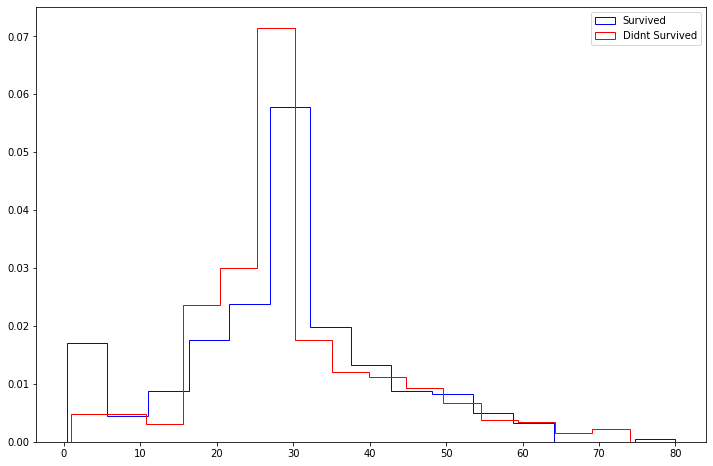

In [241]:
plt.figure(figsize=(12,8))
plt.hist(train_set['Age'].loc[train_set['Survived']==1],histtype='step',bins=15,label='Survived',color='blue',density=True)
plt.hist(train_set['Age'].loc[train_set['Survived']==0],histtype='step',bins=15,label='Didnt Survived',color='red',density=True)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


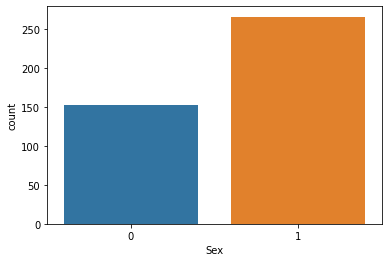

In [242]:
sns.countplot(test_set['Sex'])

In [243]:
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

**Embarked**

In [244]:
train_set.groupby(['Embarked']).size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [245]:
train_set['Embarked'].loc[train_set['Embarked'].isnull()] = 'S'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [246]:
train_set.loc[train_set['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


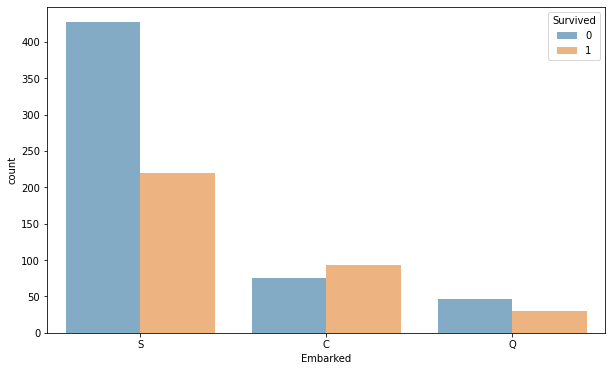

In [247]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_set,x='Embarked', hue='Survived',alpha=0.6)

Embarked shoud be consider in the analysis

**FARE**

(array([0.02915775, 0.00574844, 0.00173146, 0.00041555, 0.00027703,
        0.00027703, 0.        , 0.        , 0.00020777, 0.00020777]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <a list of 1 Patch objects>)

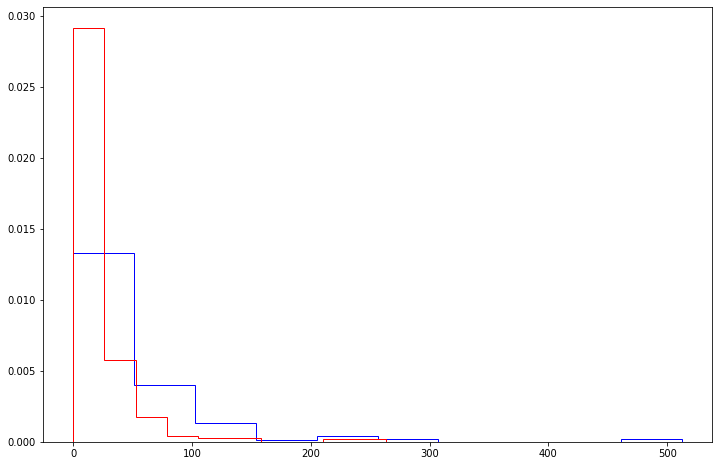

In [248]:
plt.figure(figsize=(12,8))
plt.hist(train_set['Fare'].loc[train_set['Survived']==1],histtype='step',color='blue',density=True)
plt.hist(train_set['Fare'].loc[train_set['Survived']==0],histtype='step',color='red',density=True)

In [249]:
train_set.loc[train_set['Fare'].isnull()==True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


Test db

In [250]:
test_set = pd.read_csv('test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


I have do to the same steps I did for the train set

In [251]:
test_set.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [252]:
test_set.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [253]:
test_set['Age'].loc[test_set['Age'].isnull()] = test_set['Age'].median()
test_set['Age'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

In [254]:
test_set.loc[test_set['Fare'].isnull()==True]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [255]:
#Setting fare as the median of ones Pclass
md_fare = test_set['Fare'].loc[test_set['Pclass']==3].median()
md_fare

7.8958

In [256]:
test_set['Fare'].loc[test_set['PassengerId'].isin([1044])] = md_fare

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [257]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Fare

#Final ajustments

lets set sex and embarked as a numerical feature 

In [258]:
train_set['Sex'].loc[train_set['Sex']=='male'] = 1 
train_set['Sex'].loc[train_set['Sex']=='female'] = 0 
test_set['Sex'].loc[test_set['Sex']=='male'] = 1 
test_set['Sex'].loc[test_set['Sex']=='female'] = 0 

In [259]:
train_set['Embarked'].loc[train_set['Embarked']=='S'] = 0
train_set['Embarked'].loc[train_set['Embarked']=='C'] = 1
train_set['Embarked'].loc[train_set['Embarked']=='Q'] = 2
test_set['Embarked'].loc[test_set['Embarked']=='S'] = 0
test_set['Embarked'].loc[test_set['Embarked']=='C'] = 1
test_set['Embarked'].loc[test_set['Embarked']=='Q'] = 2

In [260]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [261]:
test_set.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0


We have to rescale age and Fare features

In [262]:
#Train db
a = StandardScaler().fit_transform(np.array(train_set['Age']).reshape(-1,1))
train_set.drop(['Age'],axis=1,inplace=True)
train_set['Age'] = pd.DataFrame(a)

f = StandardScaler().fit_transform(np.array(train_set['Fare']).reshape(-1,1))
train_set.drop(['Fare'],axis=1,inplace=True)
train_set['Fare'] = pd.DataFrame(f)
#Test db
a = StandardScaler().fit_transform(np.array(test_set['Age']).reshape(-1,1))
test_set.drop(['Age'],axis=1,inplace=True)
test_set['Age'] = pd.DataFrame(a)

f = StandardScaler().fit_transform(np.array(test_set['Fare']).reshape(-1,1))
test_set.drop(['Fare'],axis=1,inplace=True)
test_set['Fare'] = pd.DataFrame(f)

In [263]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,1,0,3,1,1,0,0,-0.565736,-0.502445
1,2,1,1,0,1,0,1,0.663861,0.786845
2,3,1,3,0,0,0,0,-0.258337,-0.488854
3,4,1,1,0,1,0,0,0.433312,0.420730
4,5,0,3,1,0,0,0,0.433312,-0.486337


In [264]:
test_set.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,892,3,1,0,0,2,0.386231,-0.497071
1,893,3,0,1,0,0,1.371370,-0.511934
2,894,2,1,0,0,2,2.553537,-0.463762
3,895,3,1,0,0,0,-0.204852,-0.482135
4,896,3,0,1,1,0,-0.598908,-0.417159


exporting data

In [265]:
train_set.to_csv('train_new.csv',index=False)

In [266]:
test_set.to_csv('test_new.csv',index=False)